The Taiwanese bank has issued credit cards to many of its clients. They have maintained a dataset of credit card `DEFAULTERS` for a period from April 2005 to September 2005.


Predicting accurately which customers are most probable to default represents a significant business opportunity for all banks. This can improve the customer screening process and also helps in assessing the credibility of the customer. It also helps bank in reducing the spending limit of the credit card holder or initiate with the legal steps for amount recovery.

**Dataset Description**

The dataset contains 30,000 rows and 25 columns. Each column represents an attribute of the customer as described in the table below.

|Sr No.|Attribute|Attribute Information|
|-|-|-|
|1|ID|ID of each customer, which has been masked to display serial number to hide confidential customer information (Integer)|
|2|LIMIT_BAL|Amount of given credit in NT dollars (including supplementary creditcards) (Float)|
|3|SEX|Gender (1=male, 2=female) (Integer)|
|4|EDUCATION| (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) (Integer)|
|5|MARRIAGE|Marital status (1=married, 2=single, 3=others) (Integer)|
|6|AGE|Customer age in years (Integer)|
|7|PAY_0|Repayment status in September, 2005 (-1=paid on time, 1=payment delay for one month, 2=payment delay for two months, … , 8=payment delay for eight months and above) (Integer)|
|8|PAY_2|Repayment status in August, 2005 (scale same as above) (Integer)|
|9|PAY_3|Repayment status in July, 2005 (scale same as above) (Integer)|
|10|PAY_4|Repayment status in June, 2005 (scale same as above) (Integer)|
|11|PAY_5|Repayment status in May, 2005 (scale same as above) (Integer)|
|12|PAY_6|Repayment status in April, 2005 (scale same as above) (Integer)|
|13|BILL_AMT1|Amount of bill statement in September, 2005 (NT dollar) (Float)|
|14|BILL_AMT2|Amount of bill statement in August, 2005 (NT dollar) (Float)|
|15|BILL_AMT3|Amount of bill statement in July, 2005 (NT dollar) (Float)|
|16|BILL_AMT4|Amount of bill statement in June, 2005 (NT dollar) (Float)|
|17|BILL_AMT5|Amount of bill statement in May, 2005 (NT dollar) (Float)|
|18|BILL_AMT6|Amount of bill statement in April, 2005 (NT dollar) (Float)|
|19|PAY_AMT1|Amount of previous payment in September, 2005 (NT dollar) (Float)|
|20|PAY_AMT2|Amount of previous payment in August, 2005 (NT dollar) (Float)|
|21|PAY_AMT3|Amount of previous payment in July, 2005 (NT dollar) (Float)|
|22|PAY_AMT4|Amount of previous payment in June, 2005 (NT dollar) (Float)|
|23|PAY_AMT5|Amount of previous payment in May, 2005 (NT dollar) (Float)|
|24|PAY_AMT6|Amount of previous payment in April, 2005 (NT dollar) (Float)|
|25|default.payment.next.month|Default payment (1=yes, 0=no) (Integer)|

<br>


In [ ]:
import pandas as pd
df = pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-credit-card-fraud/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.rename(columns = {'PAY_0':'PAY_1','default.payment.next.month':'DEFAULT'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [ ]:
df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [ ]:
df['DEFAULT'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64

In [ ]:
df1 = df[['ID','SEX','DEFAULT']].groupby(by = ['DEFAULT','SEX']).count()
df1

ID
DEFAULT SEX       
0       1     9015
        2    14349
1       1     2873
        2     3763

In [ ]:
df2 = df[['ID','EDUCATION','DEFAULT']].groupby(by = ['DEFAULT','EDUCATION']).count()
df2

ID
DEFAULT EDUCATION       
0       0             14
        1           8549
        2          10700
        3           3680
        4            116
        5            262
        6             43
1       1           2036
        2           3330
        3           1237
        4              7
        5             18
        6              8

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
df.loc[df['EDUCATION']== 0,'EDUCATION'] = 5
df.loc[df['EDUCATION']== 6,'EDUCATION'] = 5
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [ ]:
df2 = df[['ID','MARRIAGE','DEFAULT']].groupby(by = ['DEFAULT','MARRIAGE']).count()
df2

ID
DEFAULT MARRIAGE       
0       0            49
        1         10453
        2         12623
        3           239
1       0             5
        1          3206
        2          3341
        3            84

In [ ]:
df.loc[df['MARRIAGE']== 0,'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
df3 = df[['ID','MARRIAGE','DEFAULT']].groupby(by = ['DEFAULT','MARRIAGE']).count()
df3

ID
DEFAULT MARRIAGE       
0       1         10453
        2         12623
        3           288
1       1          3206
        2          3341
        3            89

In [ ]:
df4 = df[['AGE','DEFAULT']].groupby(by='DEFAULT').agg(func=['mean','std','median'])
df4

AGE                 
              mean       std median
DEFAULT                            
0        35.417266  9.077355   34.0
1        35.725738  9.693438   34.0

In [ ]:
df5 = df[['LIMIT_BAL','DEFAULT']].groupby(by='DEFAULT').agg(func=['mean','std','median'])
df5

LIMIT_BAL                         
                  mean            std    median
DEFAULT                                        
0        178099.726074  131628.359660  150000.0
1        130109.656420  115378.540571   90000.0

In [ ]:
df[['LIMIT_BAL','AGE']+list(df.columns[12:-1])].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
pt1 = pd.pivot_table(data = df, values = df[['LIMIT_BAL','AGE']+list(df.columns[12:-1])], index=['DEFAULT','SEX'], aggfunc='median')
pt1

AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
DEFAULT SEX                                                               
0       1     35    25742.0    23827.0    21103.0    19483.0    18440.0   
        2     33    21368.0    20344.0    19570.0    18475.0    17318.0   
1       1     36    20139.0    20114.0    19753.0    19032.0    18161.0   
        2     33    20226.0    20503.0    20023.0    19315.0    18843.0   

             BILL_AMT6  LIMIT_BAL  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
DEFAULT SEX                                                                 
0       1      17531.0   150000.0    2458.0    2200.0    1991.0    1600.0   
        2      15872.0   160000.0    2460.0    2300.0    2000.0    1838.0   
1       1      17959.0    80000.0    1600.0    1500.0    1158.0    1000.0   
        2      18244.0   100000.0    1670.0    1600.0    1300.0    1000.0   

             PAY_AMT5  PAY_AMT6  
DEFAULT SEX                      
0       1      1600.0    1501.0  
        2      1868.0    1853.0  
1       1      1000.0     960.0  
        2      1000.0    1001.0

In [ ]:
pt2 = pd.pivot_table(data = df, values = df[['LIMIT_BAL','AGE']+list(df.columns[12:-1])], index=['DEFAULT','MARRIAGE'], aggfunc='median')
pt2

AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
DEFAULT MARRIAGE                                                               
0       1          39    22573.0    21022.0    19905.0    18532.0    17390.0   
        2          30    23469.0    22382.0    20401.0    19353.0    18336.0   
        3          42    21953.5    20432.0    18411.0    17915.5    16784.0   
1       1          40    21633.5    21190.5    20445.0    19588.0    19001.5   
        2          29    19438.0    19844.0    19492.0    18859.0    18187.0   
        3          44    18126.0    18459.0    18942.0    18300.0    17760.0   

                  BILL_AMT6  LIMIT_BAL  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
DEFAULT MARRIAGE                                                       
0       1           15442.0   180000.0    2500.0    2386.0    2000.0   
        2           17345.0   140000.0    2406.0    2200.0    2000.0   
        3           14691.0    70000.0    1943.0    1678.5    1477.5   
1       1           18320.5   100000.0    1616.5    1600.0    1238.0   
        2           17976.0    80000.0    1640.0    1500.0    1214.0   
        3           17327.0    50000.0    1700.0    1679.0    1000.0   

                  PAY_AMT4  PAY_AMT5  PAY_AMT6  
DEFAULT MARRIAGE                                
0       1           1877.0    1876.0    1800.0  
        2           1680.0    1707.0    1681.0  
        3           1062.5    1000.0    1000.0  
1       1           1000.0    1000.0    1000.0  
        2           1000.0    1000.0    1000.0  
        3           1000.0    1000.0     800.0

In [ ]:
pt3 = pd.pivot_table(data = df, values = df[['LIMIT_BAL','AGE']+list(df.columns[12:-1])], index=['DEFAULT','EDUCATION'], aggfunc='median')
pt3

AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
DEFAULT EDUCATION                                                               
0       1           32    14712.0    14244.0    14394.0    13222.0    11599.0   
        2           34    28084.5    27057.0    24908.5    21228.5    19683.0   
        3           40    27220.5    25402.5    22889.0    19559.5    18610.0   
        4           32    10734.5     8872.5     7183.0    10412.5     6342.0   
        5           35    42407.0    36011.0    31500.0    27981.0    21617.0   
1       1           33    10797.5    11730.5    11391.0    10819.5    10466.5   
        2           33    25344.0    24653.0    23086.0    20423.0    19688.5   
        3           41    21508.0    21410.0    20453.0    19584.0    18362.0   
        4           29     5374.0    12360.0    20721.0     1000.0      326.0   
        5           41    73699.5    67973.5    60048.5    45139.0    27405.5   

                   BILL_AMT6  LIMIT_BAL  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
DEFAULT EDUCATION                                                       
0       1            10075.0   200000.0    2991.0    2800.0    2101.0   
        2            19204.0   130000.0    2252.0    2100.0    2000.0   
        3            17912.0   100000.0    2069.5    2000.0    1726.0   
        4             5334.0   200000.0    3000.0    3000.0    2950.0   
        5            12106.0   160000.0    3000.0    3078.0    2524.0   
1       1             9667.0   150000.0    1500.0    1468.5    1025.5   
        2            19414.5    80000.0    1700.0    1600.0    1300.0   
        3            17636.0    50000.0    1600.0    1585.0    1200.0   
        4              390.0   120000.0    5000.0    2000.0    1000.0   
        5            25796.0   110000.0    3500.0    2690.5    1418.0   

                   PAY_AMT4  PAY_AMT5  PAY_AMT6  
DEFAULT EDUCATION                                
0       1            2000.0    2000.0    2000.0  
        2            1700.0    1700.0    1600.0  
        3            1396.5    1446.0    1304.0  
        4            1908.5    1399.5    1786.0  
        5            1842.0    1500.0    1610.0  
1       1             929.5    1000.0     902.0  
        2            1000.0    1009.5    1000.0  
        3            1000.0    1000.0    1000.0  
        4             326.0     390.0     780.0  
        5            1868.5    1295.5    1167.5

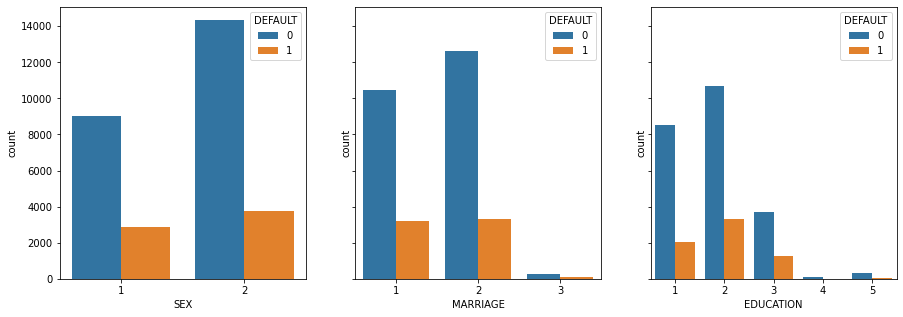

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axis = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5),sharey = True)
sns.countplot(x='SEX', data = df,hue = 'DEFAULT', ax = axis[0])
sns.countplot(x='MARRIAGE', data = df,hue = 'DEFAULT', ax = axis[1])
sns.countplot(x='EDUCATION', data = df,hue = 'DEFAULT', ax = axis[2])
plt.show()

---